# HEALTH EXPECTATION

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = sns.load_dataset('healthexp')

In [4]:
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


## 1) Discrete / Continuous Variables
 - Varaibles Discrètes : Year, Country
 - Variables continues : Spending_USD, Life_Expectancy

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     274 non-null    float64
 3   Life_Expectancy  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB


In [6]:
df.nunique()

Year                51
Country              6
Spending_USD       274
Life_Expectancy    118
dtype: int64

## 2) Analyse de la variable "Country"
**Conclusion :** 
 - Nous ne disposons pas de toutes les données pour la Germany, Canada, Great Britain et la France sur toute la perdiode allant de 1970 à 2020.
 - La France est le pays ayant le moins de données sur la période allant de 1970 à 2020 (35/51).

In [7]:
df['Country'].value_counts().sort_index()

Country
Canada           44
France           35
Germany          50
Great Britain    43
Japan            51
USA              51
Name: count, dtype: int64

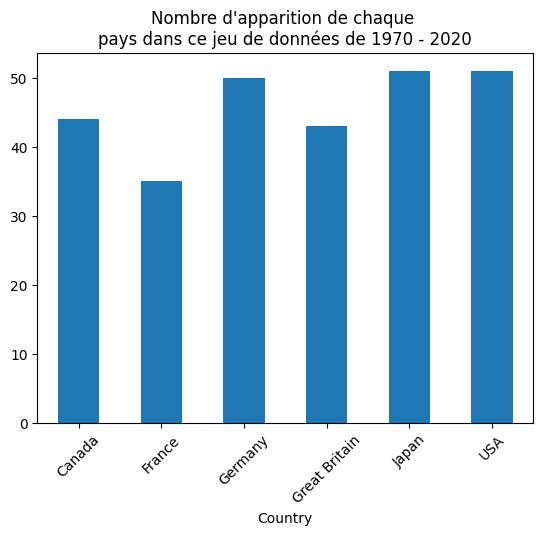

In [8]:
# Méthode 1
df['Country'].value_counts().sort_index().plot(kind='bar', rot=45)
plt.title("Nombre d'apparition de chaque \npays dans ce jeu de données de 1970 - 2020")
plt.show()

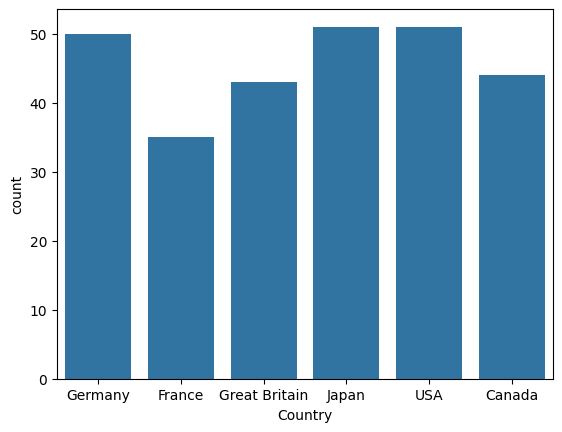

In [9]:
# Méthode 2
sns.countplot(data=df, x='Country')
plt.show()

## 3) Analyse de la variable "Spending_USD"
**Conclusion :**
 - La dépense de santé annuelle moyenne par habitant de tous les pays(France, Allemagne, USA, Canada et Grand-Bretagne) sur la période allant de 1970 à 2020 est de 2789 USD. (OU La France, Allemagne, USA, Canada et la Grand-Bretagne, ont dépensé ensemble en moyenne 2789 USD par an de 1970 à 2020.)
 - L'écart-type du jeu de données est proche de la moyenne. L'écart-type est l'élevé ! -> Les données sont très dispersées !
 - La médiane du jeu de données est inférieur de 600 USD à la moyenne -> probablement la distribution est asymétrique à droite : il y a des outliers qui tirent la moyenne vers le haut.
 - La plus petite dépense est de 123 USD ! -> Quel pays ? Quelle année ?
 - La plus grosse dépense est 11859 USD ! -> Quel pays ? Quelle annnée ?

In [10]:
df['Spending_USD'].describe()

count      274.000000
mean      2789.338905
std       2194.939785
min        123.993000
25%       1038.357000
50%       2295.578000
75%       4055.610000
max      11859.179000
Name: Spending_USD, dtype: float64

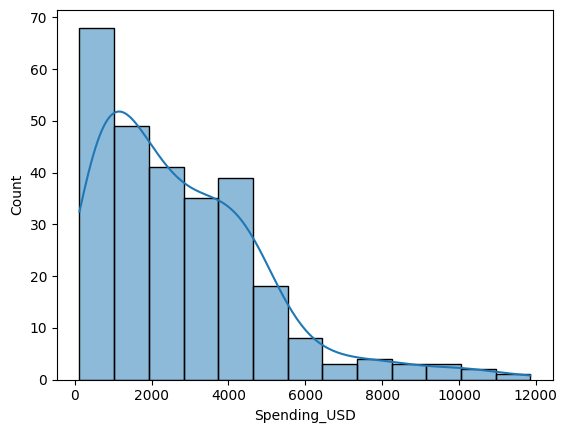

In [11]:
# Méthode 1 : Avec histplot()
sns.histplot(data=df, x='Spending_USD', kde=True);

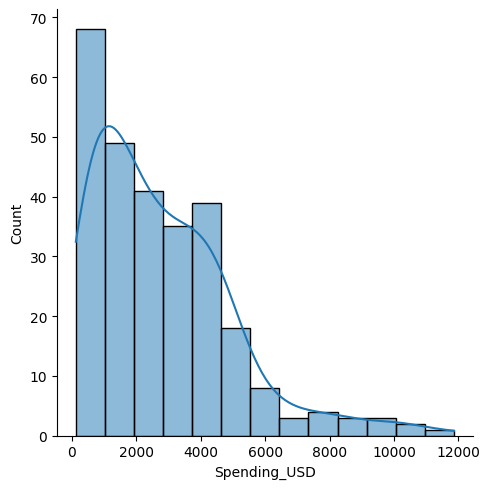

In [12]:
# Méthode 2 : Avec displot()
sns.displot(data=df, x='Spending_USD', kde=True);

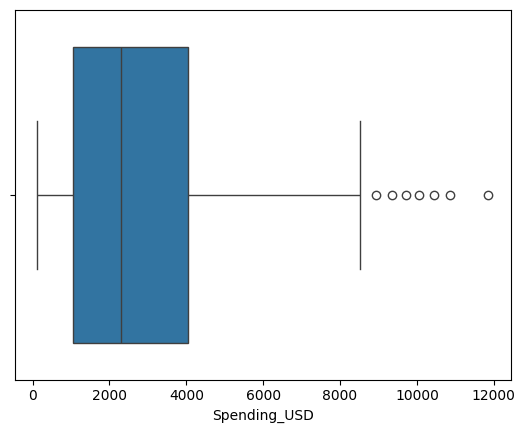

In [13]:
sns.boxplot(data=df, x='Spending_USD');

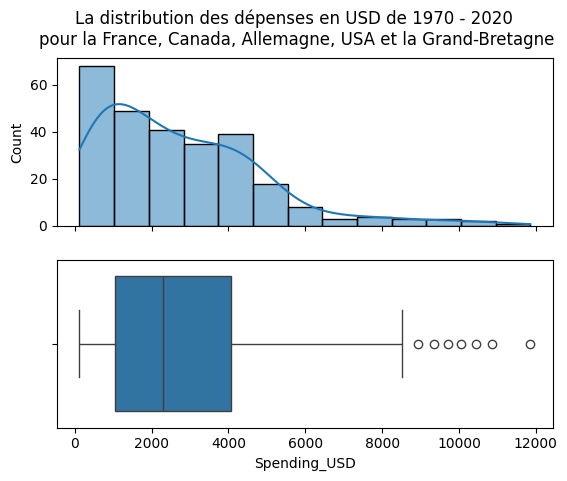

In [14]:
fig, ax = plt.subplots(2, 1, sharex=True)
plt.suptitle("La distribution des dépenses en USD de 1970 - 2020 \npour la France, Canada, Allemagne, USA et la Grand-Bretagne")
sns.histplot(data=df, x='Spending_USD', kde=True, ax=ax[0])
sns.boxplot(data=df, x='Spending_USD', ax=ax[1])
plt.show()

## 4) Analyse de la variable "Life_Expectancy"
 - L'espérance de vie moyenne pour les pays, France, Allemagne, Canada, Japon, USA et la Grande-Bretagne, sur la période allant de 1970 à 2020 été de 77.9 ans.
 - La médiane est très proche de la moyenne, ce qui suggère que la distribution est symétrique.

In [15]:
df['Life_Expectancy'].describe()

count    274.000000
mean      77.909489
std        3.276263
min       70.600000
25%       75.525000
50%       78.100000
75%       80.575000
max       84.700000
Name: Life_Expectancy, dtype: float64

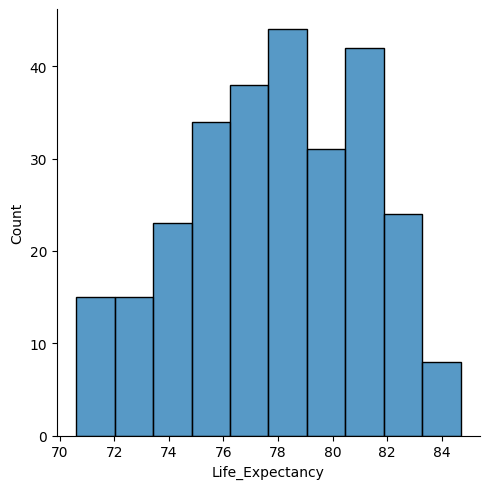

In [16]:
sns.displot(data=df, x='Life_Expectancy');

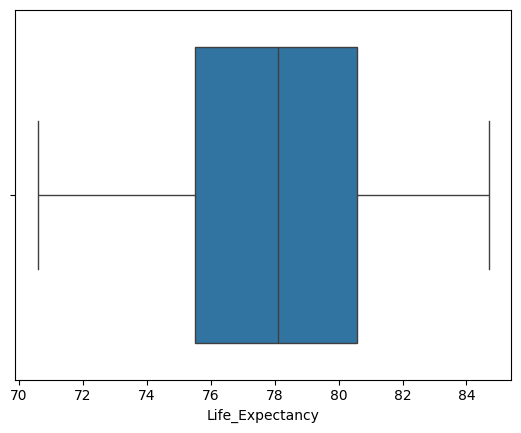

In [17]:
sns.boxplot(data=df, x='Life_Expectancy');

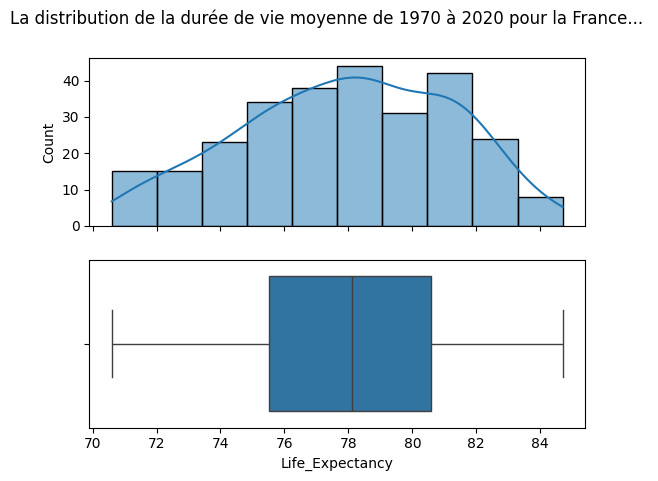

In [18]:
fig, ax = plt.subplots(2, 1, sharex=True)
plt.suptitle("La distribution de la durée de vie moyenne de 1970 à 2020 pour la France... ")
sns.histplot(data=df, x='Life_Expectancy', ax=ax[0], kde=True)
sns.boxplot(data=df, x='Life_Expectancy', ax=ax[1])
plt.show()

## 5) Evolution de la durée de vie en fonction du temps
**Hypothèse**
 - La moyenne de l'espérance de vie des pays est en lègère augmentation au fil du temps, de 1970 à 2020.

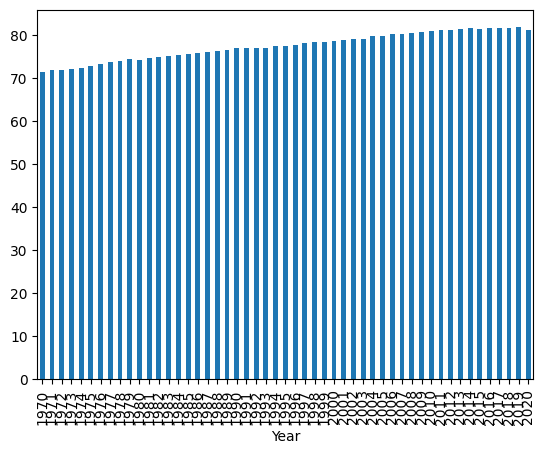

In [19]:
df.groupby('Year')['Life_Expectancy'].mean().plot.bar();

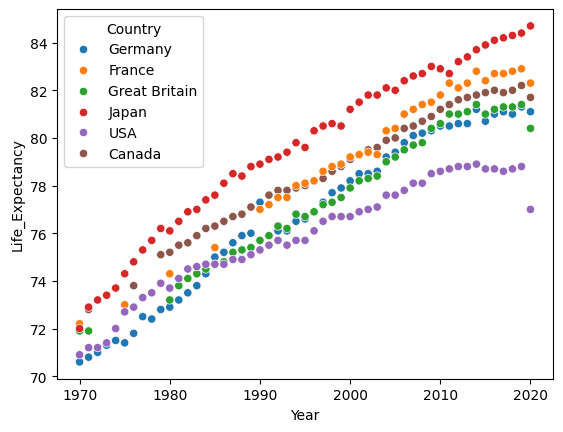

In [20]:
sns.scatterplot(data=df, x='Year', y='Life_Expectancy', hue='Country')
plt.show()

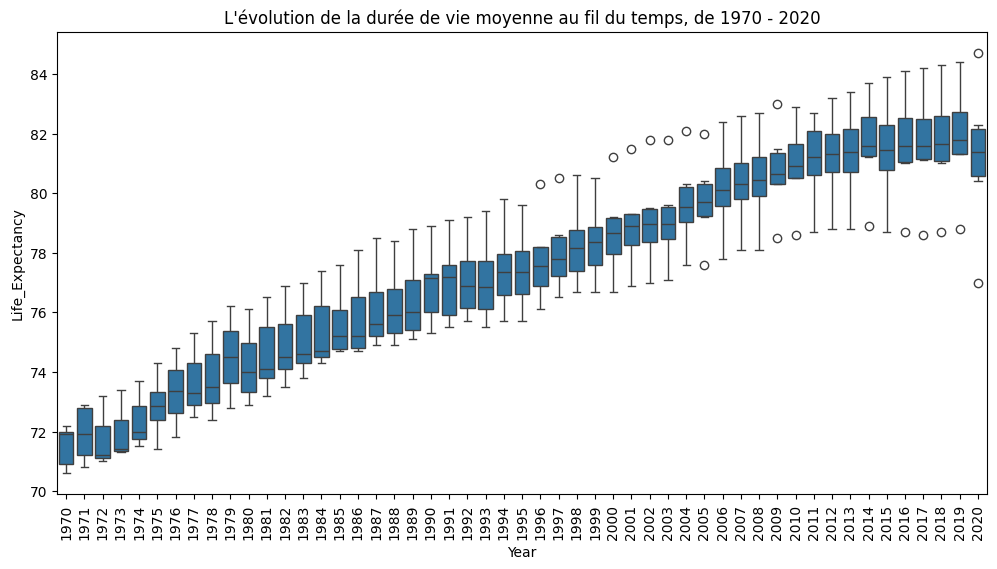

In [21]:
plt.figure(figsize=(12, 6))
plt.title("L'évolution de la durée de vie moyenne au fil du temps, de 1970 - 2020")
sns.boxplot(data=df, x='Year', y='Life_Expectancy')
plt.xticks(rotation=90)
plt.show()

## 7) Evolution des dépenses en santé Germany et Great Britain
 - Les dépenses de santé de l'allemagne sont plus importantes que celles de la Grante-Bretagne au fil du temps, de 1970 à 2020.

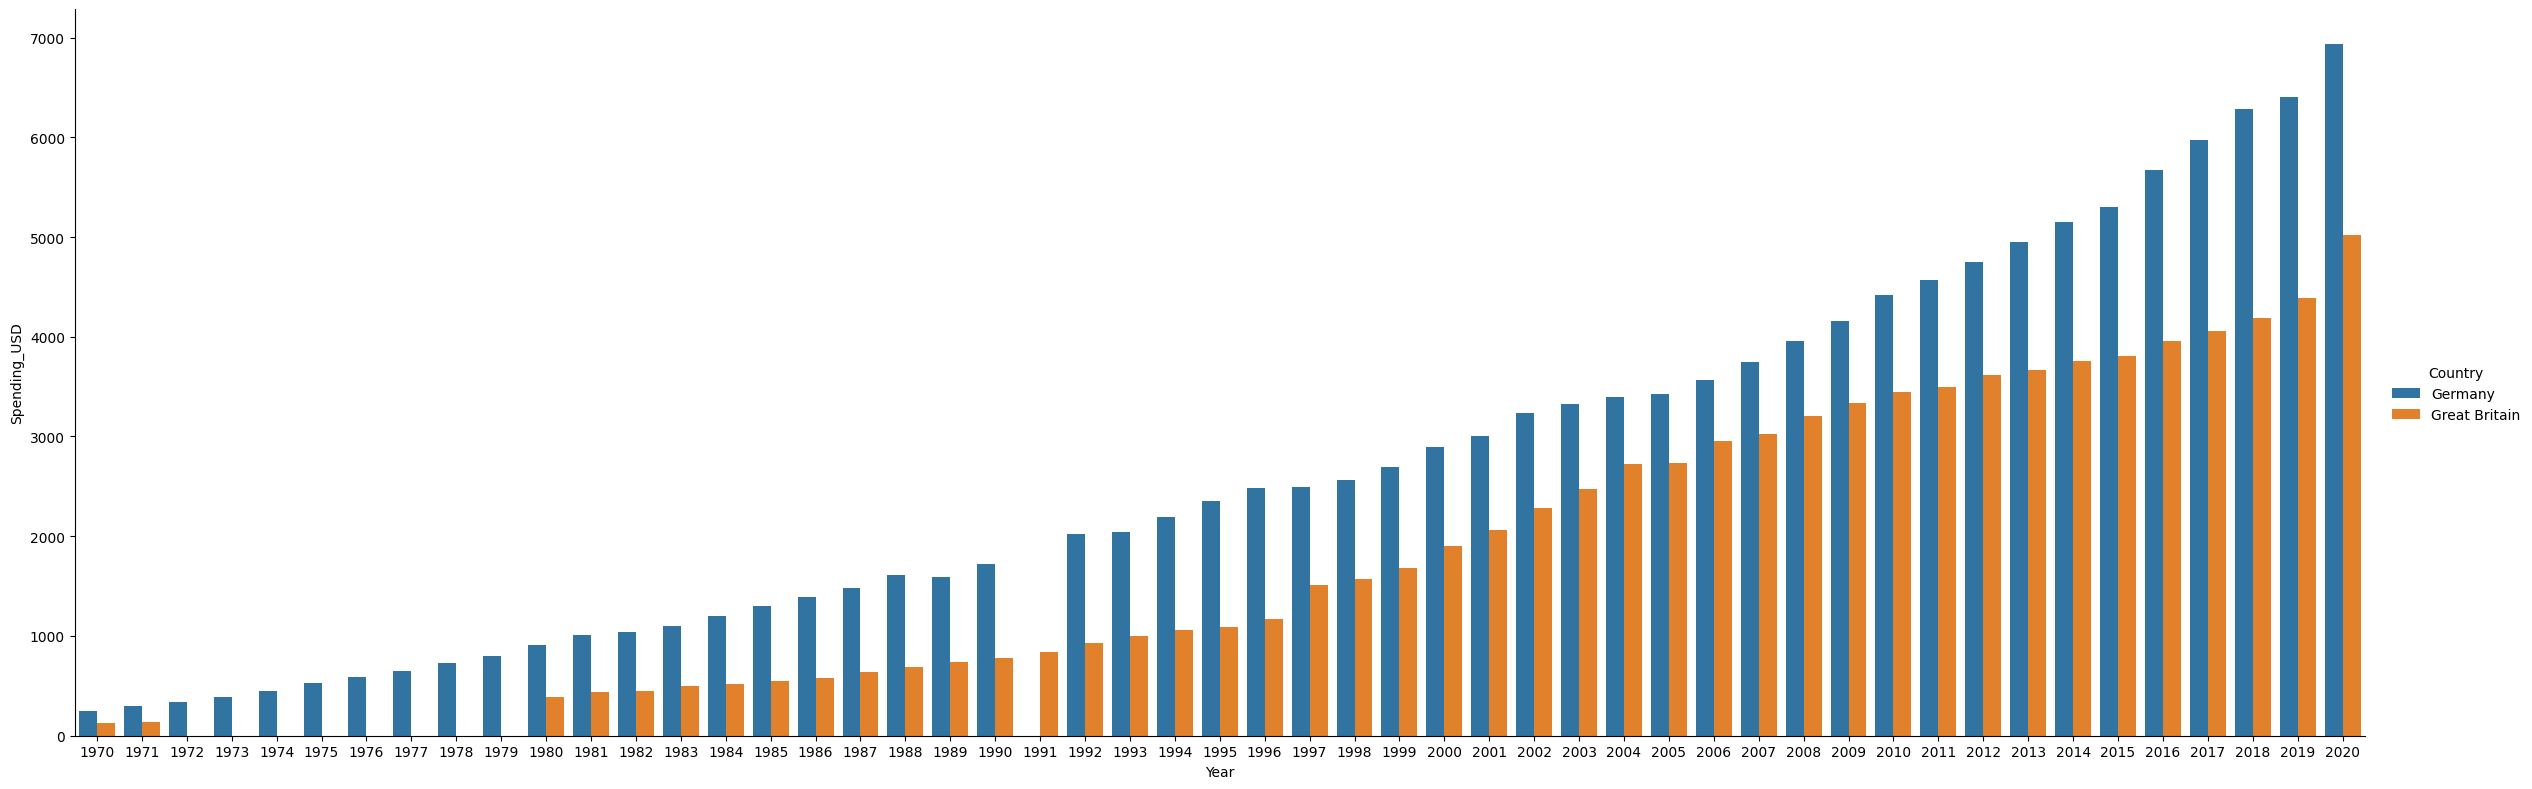

In [22]:
sns.catplot(
    data=df[df['Country'].isin(['Great Britain', 'Germany'])],
    x='Year',
    y='Spending_USD',
    kind='bar',
    hue='Country',
    height=8,
    aspect=3);

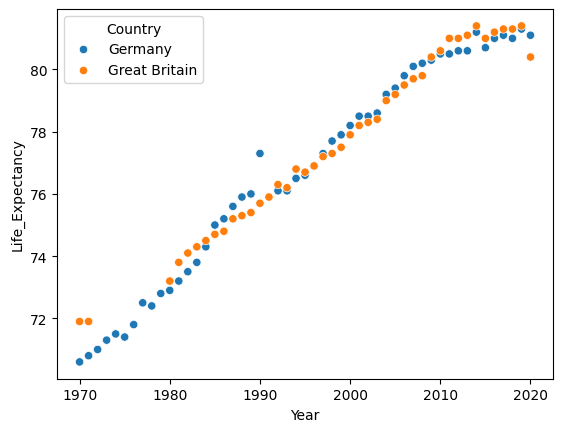

In [23]:
sns.scatterplot(data=df[df['Country'].isin(['Great Britain', 'Germany'])], x='Year', y='Life_Expectancy', hue='Country')
plt.show()

## 8) Observez l'histograme, la boxplot, et les statistiques de "Life_Expectancy" propre à chaque pays.

In [24]:
df.groupby('Country')['Life_Expectancy'].describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Canada,44.0,78.706818,2.502222,72.8,76.775,78.7,80.975,82.2
France,35.0,79.565714,2.862120,72.2,78.050,79.4,82.200,82.9
Germany,50.0,76.726000,3.473915,70.6,73.575,77.1,80.175,81.3
Great Britain,43.0,77.620930,2.827548,71.9,75.350,77.5,80.400,81.4
Japan,51.0,79.554902,3.547242,72.0,76.950,79.8,82.650,84.7
USA,51.0,75.843137,2.336258,70.9,74.550,75.7,77.950,78.9


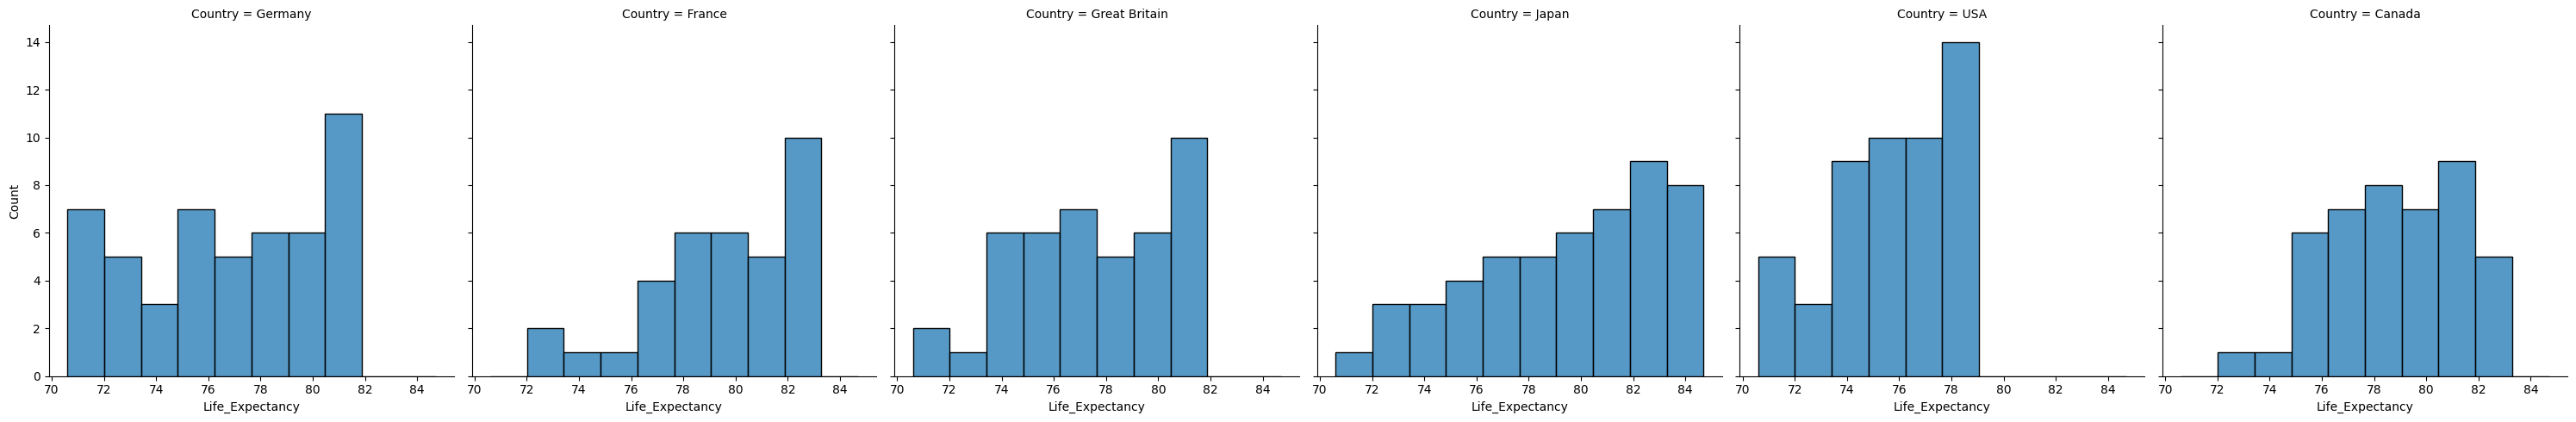

In [25]:
sns.displot(data=df, x='Life_Expectancy', col='Country');

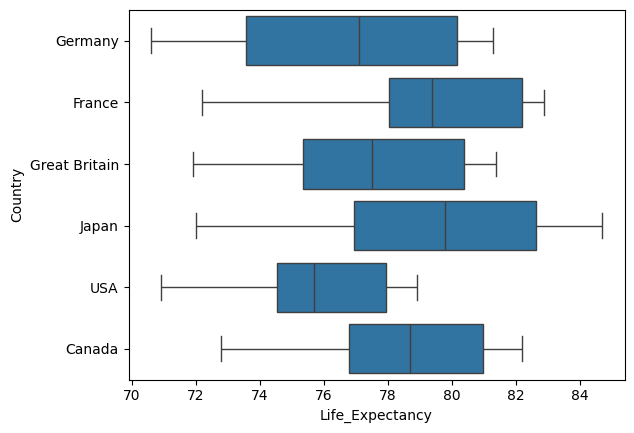

In [26]:
sns.boxplot(data=df, x='Life_Expectancy', y='Country');

##  Observez la relation entre la durée de vie et les dépenses dans la santé, aux États-Unis, de 2000 à 2020
 - Les 

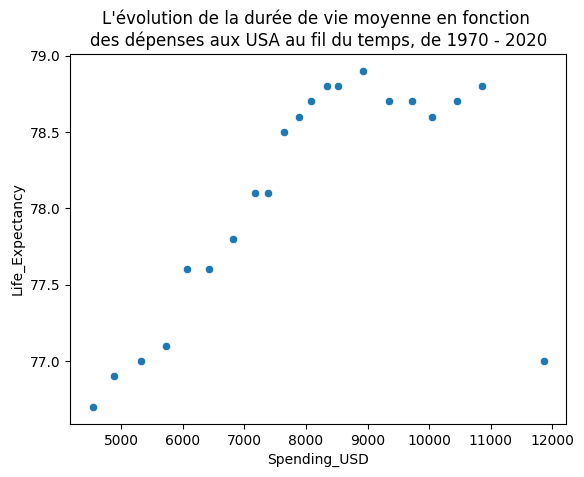

In [27]:
sns.scatterplot(data=df.query("Country == 'USA' & Year >= 2000"), x='Spending_USD', y='Life_Expectancy')
plt.title("L'évolution de la durée de vie moyenne en fonction \ndes dépenses aux USA au fil du temps, de 1970 - 2020")
plt.show()

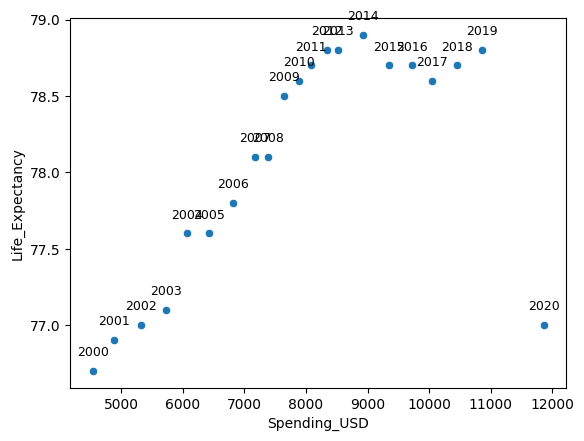

In [28]:
# Création du scatterplot
sns.scatterplot(data=df.query("Country == 'USA' & Year >= 2000"), 
                     x='Spending_USD', y='Life_Expectancy')

# Ajout des annotations pour chaque point
for _, row in df.query("Country == 'USA' & Year >= 2000").iterrows():
    plt.text(row['Spending_USD'], row['Life_Expectancy'] + 0.1, str(row['Year']), 
            ha='center', fontsize=9, color='black')

# Affichage du graphique
plt.show()

## Il y a une valeur abérante tant tout cela. Laquelle? Pourquoi?
 - La valeur (2020, 11859.17) est une valeur abérrante, car d'après le diagramme dépenses-espérance, ce n'est pas logique d'avoir pour une telle dépense pour une espérance de vie aussi faible (77 ans) d'autant en 2019 l'espérance  était de 79 ans.
 - Ce outlier peut avoir un lien avec la crise de Covid19

# Tests des hypothèses

## 1) Dans les vidéos précédentes, il semblait également que l'Allemagne et la Grande-Bretagne avaient la même durée de vie moyenne de 1970 à 2020.

- Peut-on tester cela avec l'une des techniques vues dans les précédentes vidéos ?
  - Non, car le test student implique une dépendance entre les différentes observations, chose qui n'est pas respectée ici.
  - De plus, il faut faire attention à la question qui nous intéresse vraiment :
     - Est-ce que la moyenne des durrées de vie de l'Allemagne et la GB de 1970 à 2020 ?
     - Ou bien le fait de vouloir vérifier si à travers le temps, ces deux pays avaient en moyenne la même durée de vie. (Pour analyser si deux séries temporelles se 'superposes' bien, on utilisera d'autres outils (DTW, ARIMA, etc))

## 2) Spending_USD et Life_Expectancy semblent être corrélées.

- Quelle est la corrélation de Pearson entre ces deux variables aux États-Unis, de 2000 à 2020 ?

- Quelle serait la probabilité d'obtenir une corrélation au moins aussi importante que celle-ci, si en réalité les deux variables n'étaient pas corrélées ?

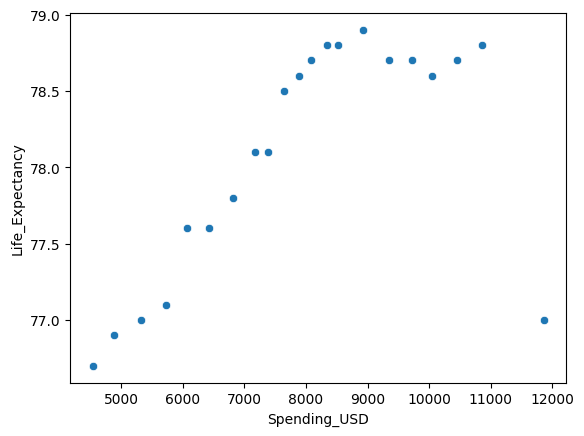

In [29]:
usa = df.query("Country == 'USA' & Year >= 2000")
sns.scatterplot(data=df, x=usa["Spending_USD"], y=usa['Life_Expectancy'])
plt.show()

In [30]:
from scipy.stats import pearsonr

print("H0 : Les deux variables (Spending_USD et Life_Expectancy) ne sont pas corrélées.\n")

r, p_value = pearsonr(usa['Spending_USD'], usa['Life_Expectancy'])

print(f"La corrélation de Pearnon entre ces deux variables est : {r.round(2)}")
print(f"La probabilité d'obtenir une corrélation au moins aussi extrême si les deux variables étaient totalement décorrélées serait : {p_value.round(3)}%"
      "\nAutrement dit elle serait de 1 chance sur 376.")


H0 : Les deux variables (Spending_USD et Life_Expectancy) ne sont pas corrélées.

La corrélation de Pearnon entre ces deux variables est : 0.62
La probabilité d'obtenir une corrélation au moins aussi extrême si les deux variables étaient totalement décorrélées serait : 0.003%
Autrement dit elle serait de 1 chance sur 376.


##  3) Un politicien américain affirme que depuis 1970, la durée de vie aux États-Unis augmente en moyenne de 0,3 an. 
Testez cette affirmation et donnez votre conclusion avec un niveau de confiance de 98 % (alpha = 0,02). (Vous pouvez utiliser la fonction `.diff()` de pandas pour calculer la différence d'une ligne à l'autre dans votre DataFrame).

Conditions pour utiliser le ttest 1 sample :
- Données indépendantes des uns des autres
- Issues d'une distribution normale (ou > de 30 points)

/var/folders/tg/282tbv055fj5nx_knpv64mk80000gn/T/ipykernel_23476/1144993769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Diff_Life'] = df1['Life_Expectancy'].diff()


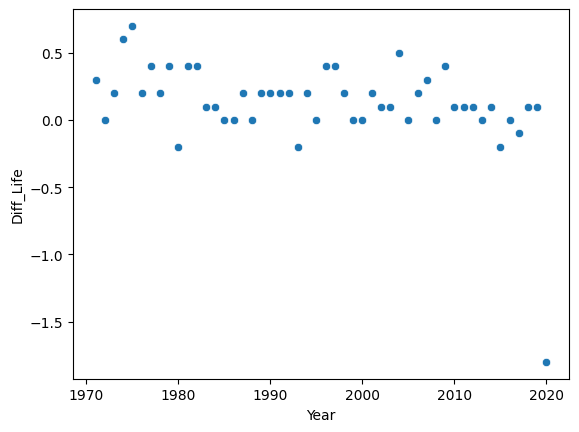

In [52]:
df1 = df.query("Country=='USA'")
df1['Diff_Life'] = df1['Life_Expectancy'].diff()
sns.scatterplot(data=df1, x=df1['Year'], y=df1['Diff_Life']);

--> Les données sont indépendantes des unes des autres

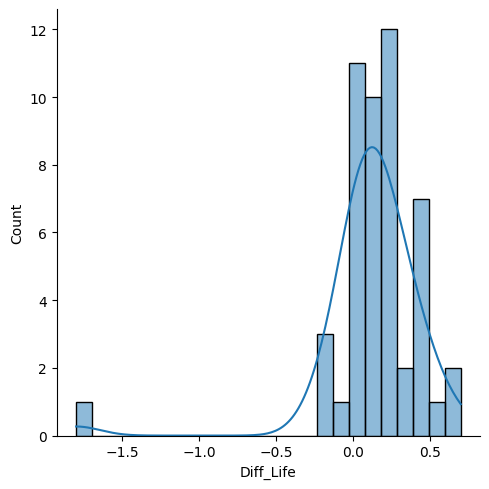

In [51]:
sns.displot(data=df1, x=df1['Diff_Life'], kde=True);

--> Les données ont une distribution normale

In [64]:
print("H0: Aux USA, la durée de vie augmente en moyenne de 0.3 par an depuis 1970\n")
alpha = 0.02
popmean = 0.3

from scipy.stats import ttest_1samp
t_stat, p_value = ttest_1samp(a=df1['Diff_Life'].dropna(), popmean=popmean)

print(f"La moyenne attendu : {popmean}")
print(f"La moyenne observée : {df.query("Country=='USA'")['Life_Expectancy'].diff().mean().round(2)}")
print(f"La probabilté d'avoir une statistique au moins aussi extrême que celle observée est {p_value.round(3)} %. Autrement dit on a 1 chance sur {(1/p_value).round()}\n")

if p_value < alpha:
    print("La durée de vie aux USA DIFFÈRE SIGNIFICATIVEMENT de la moyenne attendue. La p_value de notre test est < à 0.02 --> On peut "
    "\ndonc rejeter l'hypothèse du politicien américain")
else:
    print("Nous n'avons suffisamment d'évidences pour rejeter H0.")




H0: Aux USA, la durée de vie augmente en moyenne de 0.3 par an depuis 1970

La moyenne attendu : 0.3
La moyenne observée : 0.12
La probabilté d'avoir une statistique au moins aussi extrême que celle observée est 0.001 %. Autrement dit on a 1 chance sur 1956.0

La durée de vie aux USA DIFFÈRE SIGNIFICATIVEMENT de la moyenne attendue. La p_value de notre test est < à 0.02 --> On peut 
donc rejeter l'hypothèse du politicien américain
